# Apéndice II

# Índice
## 1. Objetivo.
## 2. Missing values
## 2.1. Missing Data Heatmap
## 2.2. Missing Data Percentage List
## 3. Outliers (Datos fuera de rango)
## 3.1. Histograma /Box Plot
## 3.2. Bar Chart
## 4. Datos innecesarios
## 4.1. Tipo innecesario: Duplicados

# Mineria de datos dataset anime
Se importá un conjunto de datos de anime y se realizán los pasos necesarios para analizar los datos.

# 1. Objetivo
Se realizara un pre-analisis de datos para validar la calidad de los datos a graficar.

In [33]:
# importamos los paquetes a utilizar
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

Leemos el fichero "anime.csv"

In [34]:
# Leemos datos
df = pd.read_csv('anime.csv')

Comprobamos los tipos y la cantidad de instacias que tenemos

In [35]:
# Retornamos dimensiones DataFrame y tipos de datos por columna
print(df.shape)
print(df.dtypes)

(17562, 35)
MAL_ID             int64
Name              object
Score            float64
Genres            object
English name      object
Japanese name     object
Type              object
Episodes         float64
Aired             object
Premiered         object
Producers         object
Licensors         object
Studios           object
Source            object
Duration          object
Rating            object
Ranked           float64
Popularity         int64
Members            int64
Favorites          int64
Watching           int64
Completed          int64
On-Hold            int64
Dropped            int64
Plan to Watch      int64
Score-10         float64
Score-9          float64
Score-8          float64
Score-7          float64
Score-6          float64
Score-5          float64
Score-4          float64
Score-3          float64
Score-2          float64
Score-1          float64
dtype: object


Comprobamos de todas las variables, que subconjunto son númericas.

In [36]:
# Verificamos y mostramos columnas numericas
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['MAL_ID' 'Score' 'Episodes' 'Ranked' 'Popularity' 'Members' 'Favorites'
 'Watching' 'Completed' 'On-Hold' 'Dropped' 'Plan to Watch' 'Score-10'
 'Score-9' 'Score-8' 'Score-7' 'Score-6' 'Score-5' 'Score-4' 'Score-3'
 'Score-2' 'Score-1']


Hacemos lo mismo con las variables que no son númericas

In [37]:
# Verificamos y mostramos columnas no numericas
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


['Name' 'Genres' 'English name' 'Japanese name' 'Type' 'Aired' 'Premiered'
 'Producers' 'Licensors' 'Studios' 'Source' 'Duration' 'Rating']


De estos resultados, aprendemos que el conjunto de datos tiene **17.562** filas y **35** columnas. También identificamos si las características son variables numéricas o categóricas. Todas ellas son información útil.
Ahora podemos revisar la lista de tipos de datos "sucios" y arreglarlos uno por uno.


# 2. Missing values

## 2.1. Missing Data Heatmap
Cuando hay un número menor de características, podemos visualizar los datos que faltan a través del mapa de calor.

<Axes: >

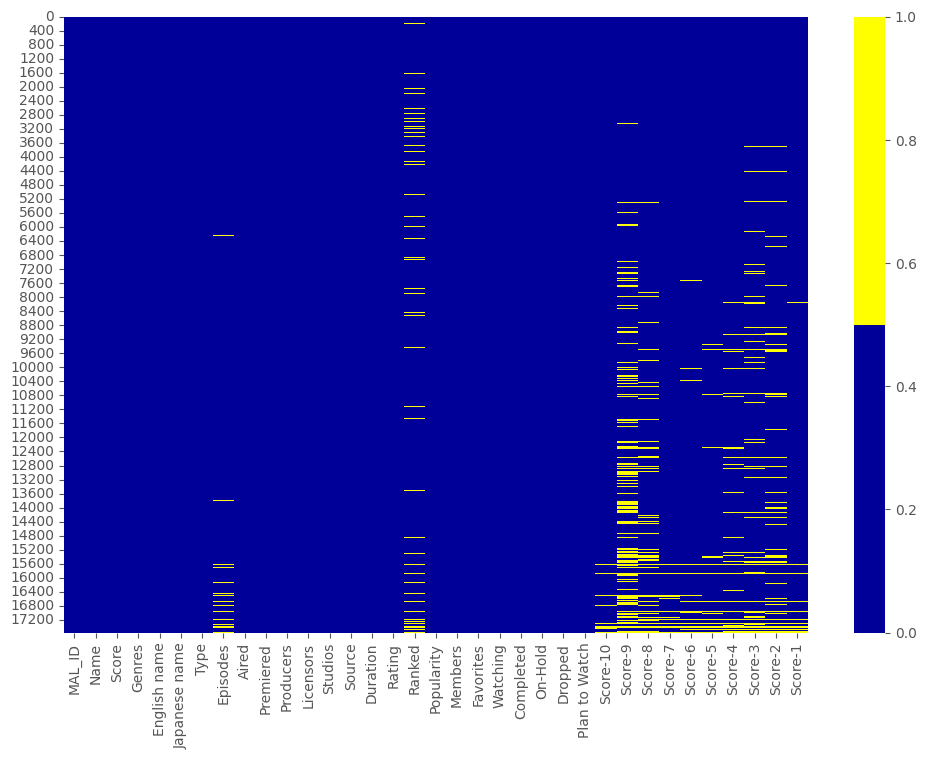

In [38]:
cols = df.columns[:35] # Toma las 35 columnas
colours = ['#000099', '#ffff00'] # Especifica los colores - amarillo es missing. azul contiene valores.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

El gráfico que figura  muestra los patrones de datos que faltan de las 35 características.
El eje horizontal muestra el nombre del atributo de entrada; el eje vertical muestra el número de observaciones/filas; el color amarillo representa los datos que faltan, mientras que el color azul, en caso contrario.
Vemos que faltan muchos datos en las columnas que contienen *Score* principalmente por lo que estos datos son menos relevantes, Pero tambien falta una parte de los datos *Episodes* y *Ranked*.


## 2.2. Missing Data Percentage List
Vamos a  hacer una lista de los % de datos que faltan para cada característica.

In [39]:
# Porcentaje (%) de missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

MAL_ID - 0%
Name - 0%
Score - 0%
Genres - 0%
English name - 0%
Japanese name - 0%
Type - 0%
Episodes - 3%
Aired - 0%
Premiered - 0%
Producers - 0%
Licensors - 0%
Studios - 0%
Source - 0%
Duration - 0%
Rating - 0%
Ranked - 10%
Popularity - 0%
Members - 0%
Favorites - 0%
Watching - 0%
Completed - 0%
On-Hold - 0%
Dropped - 0%
Plan to Watch - 0%
Score-10 - 2%
Score-9 - 18%
Score-8 - 8%
Score-7 - 3%
Score-6 - 3%
Score-5 - 3%
Score-4 - 6%
Score-3 - 7%
Score-2 - 9%
Score-1 - 3%


# 3. Outliers (Datos fuera de rango)

Los valores atípicos son datos que son distintivamente diferentes de otras observaciones.

## 3.1. Histograma /Box Plot

Para las características numéricas, vamos a usar un histograma y un diagrama de caja para detectar los valores atípicos.
A continuación se muestra el histograma del rasgo *Score*.





<Axes: >

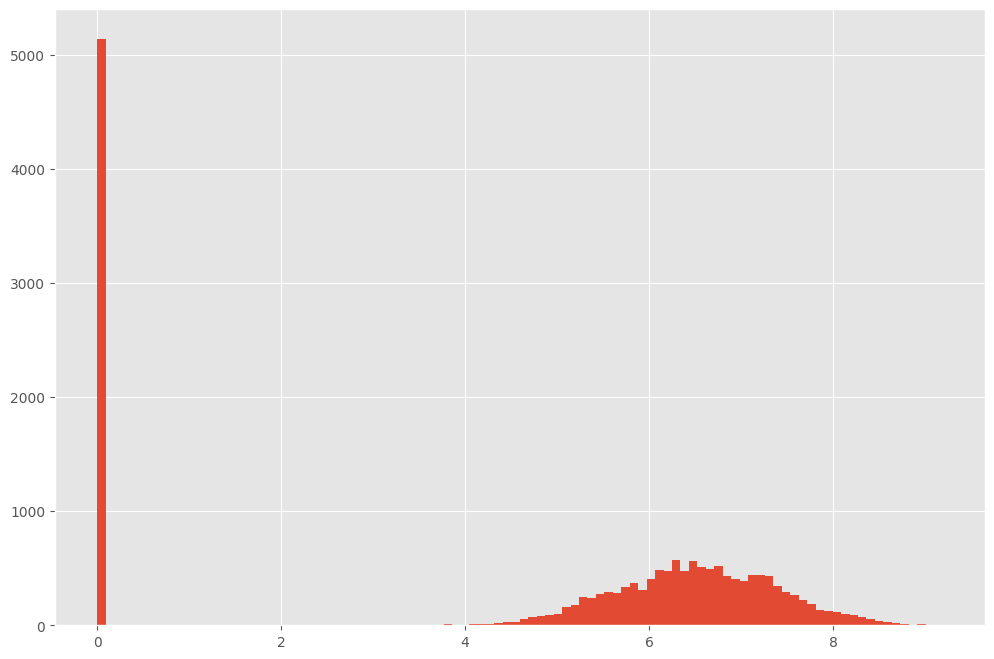

In [40]:
# Histograma de Score.
df['Score'].hist(bins=100)

<Axes: >

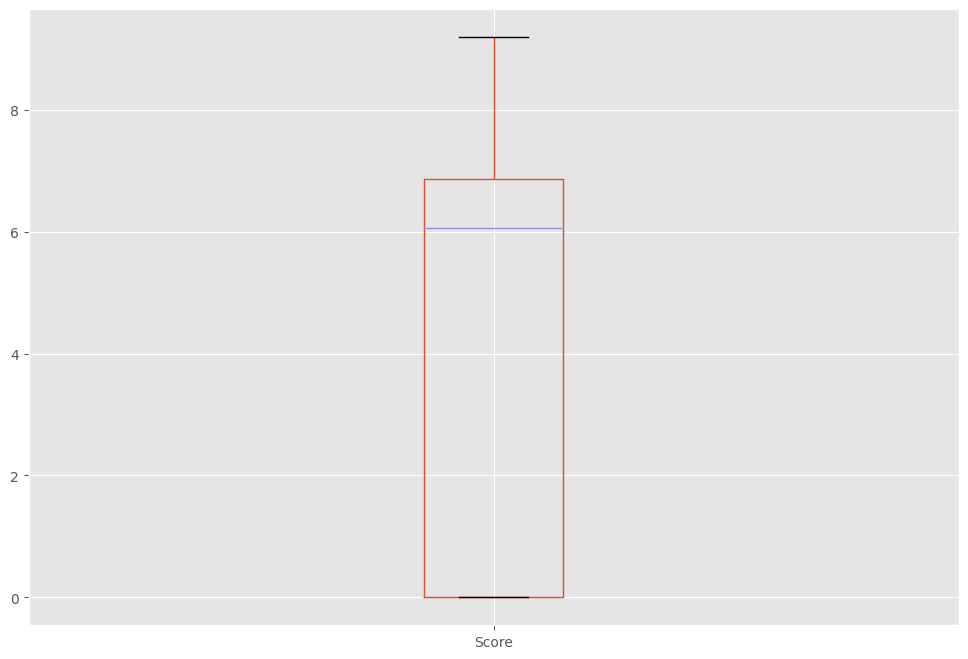

In [41]:
# box plot.
df.boxplot(column=['Score'])

<Axes: >

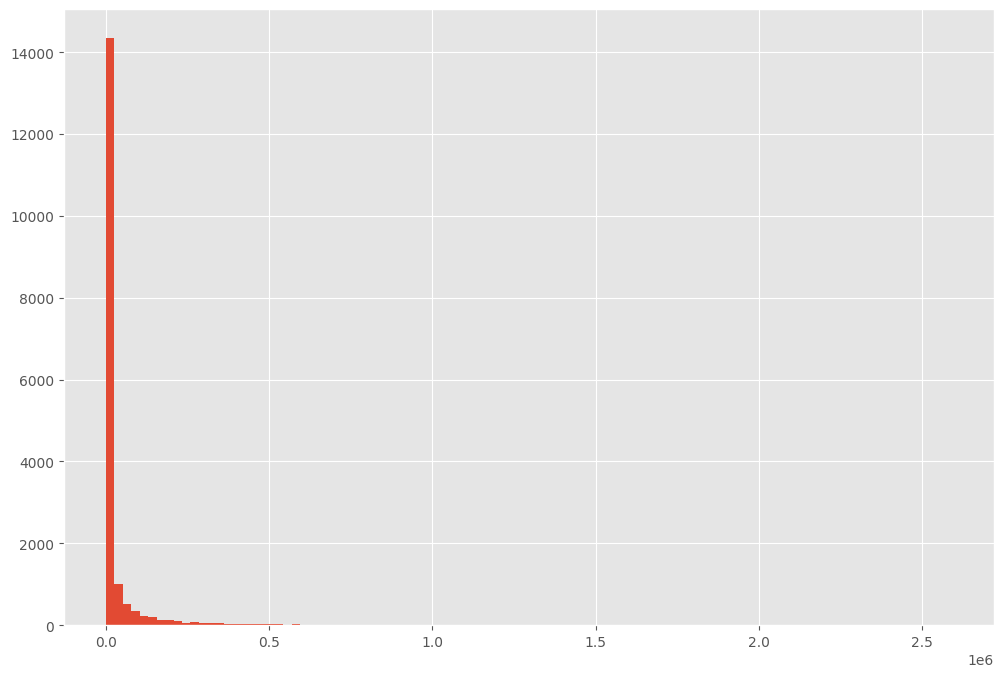

In [42]:
# Histograma de Miembros.
df['Members'].hist(bins=100)

<Axes: >

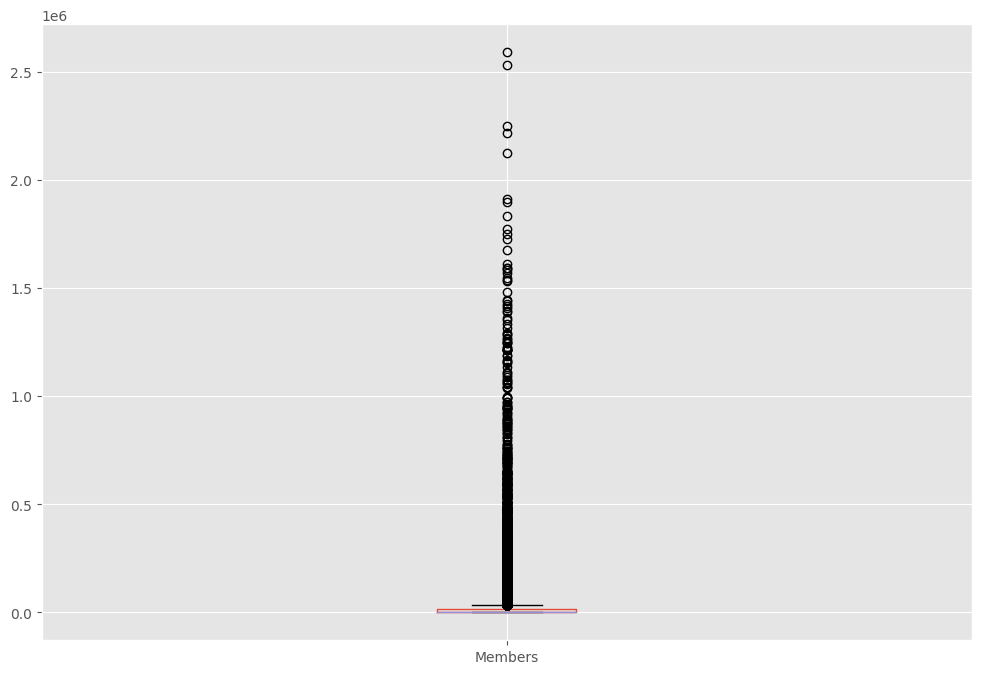

In [43]:
# box plot.
df.boxplot(column=['Members'])

<Axes: >

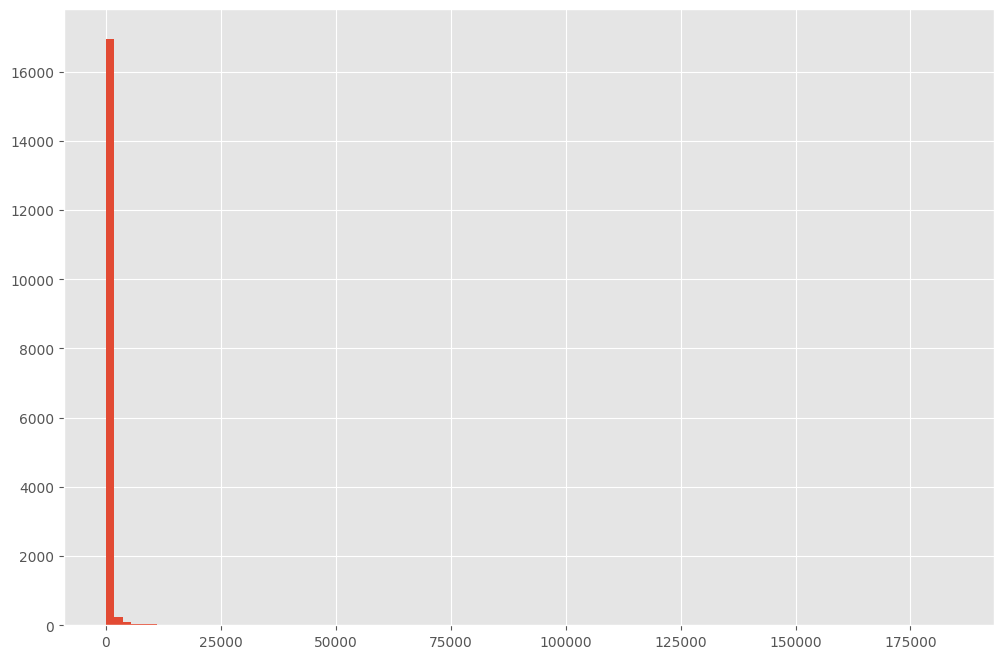

In [44]:
# Histograma de favoritos.
df['Favorites'].hist(bins=100)

<Axes: >

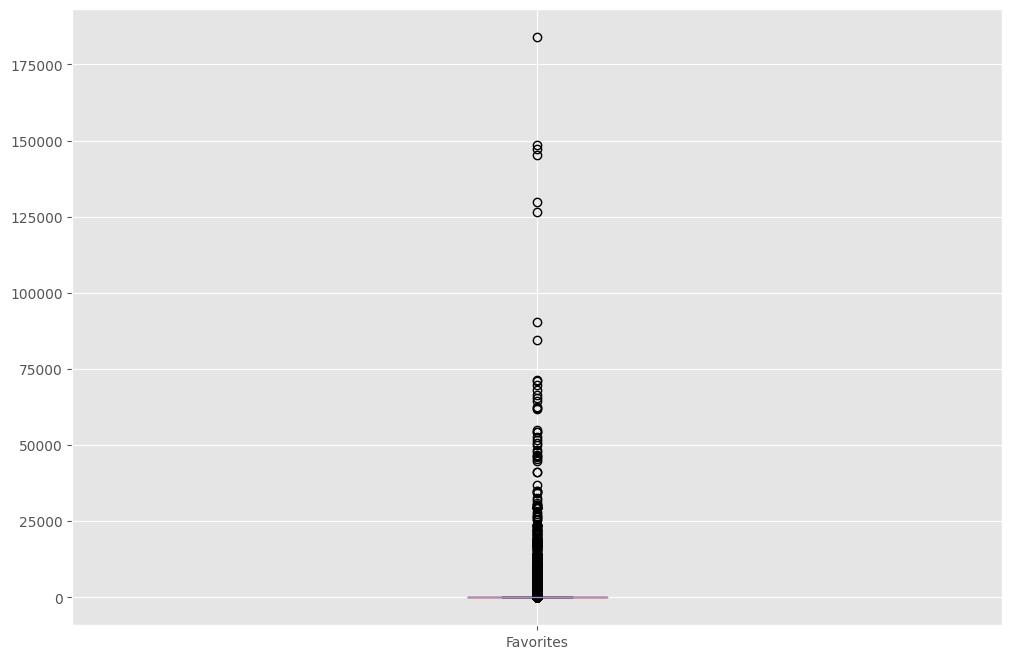

In [45]:
# box plot.
df.boxplot(column=['Favorites'])

<Axes: >

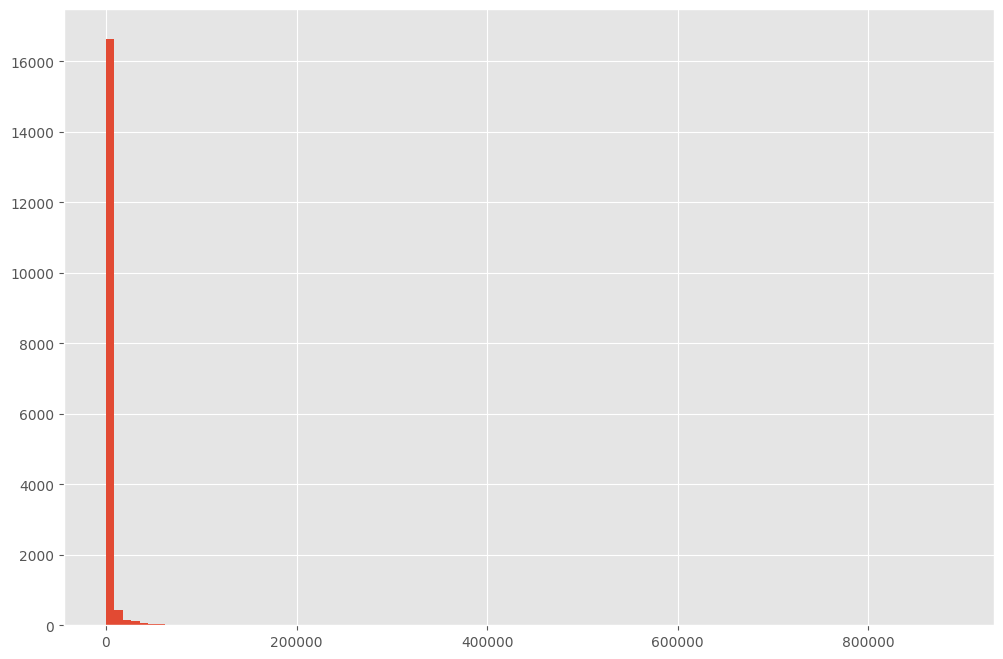

In [46]:
# Histograma de vistos.
df['Watching'].hist(bins=100)

<Axes: >

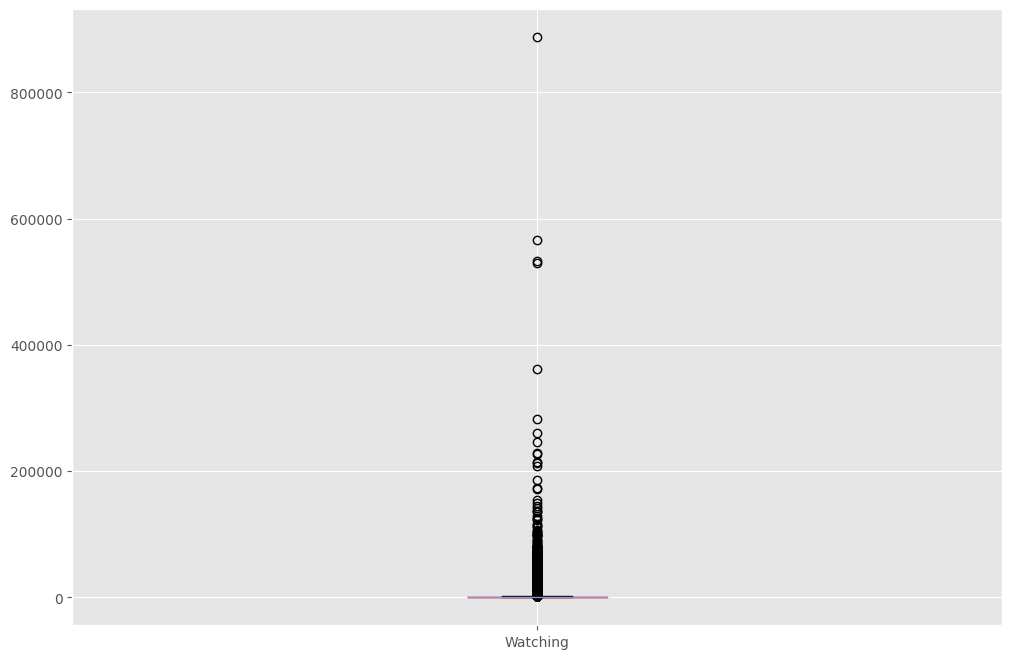

In [47]:
# box plot.
df.boxplot(column=['Watching'])

<Axes: >

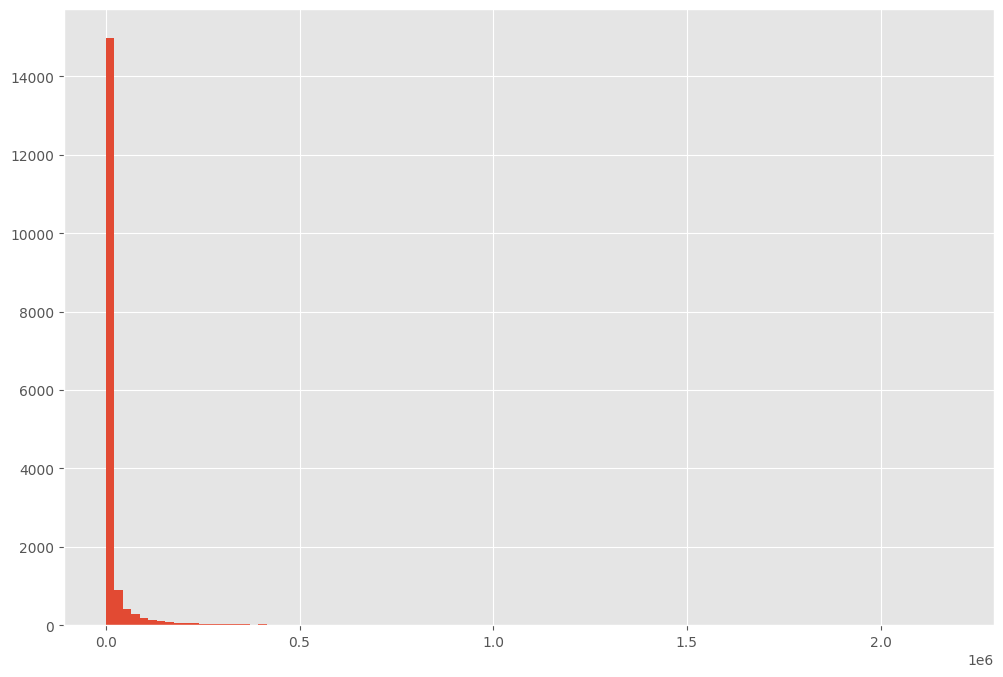

In [48]:
# Histograma de Completo.
df['Completed'].hist(bins=100)

<Axes: >

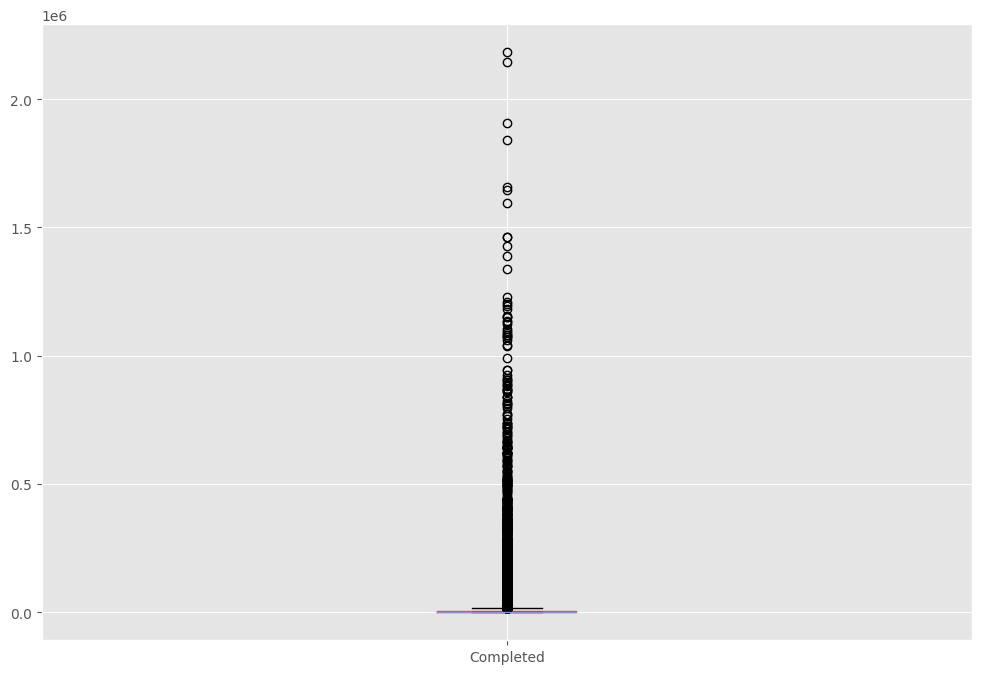

In [49]:
# box plot.
df.boxplot(column=['Completed'])

<Axes: >

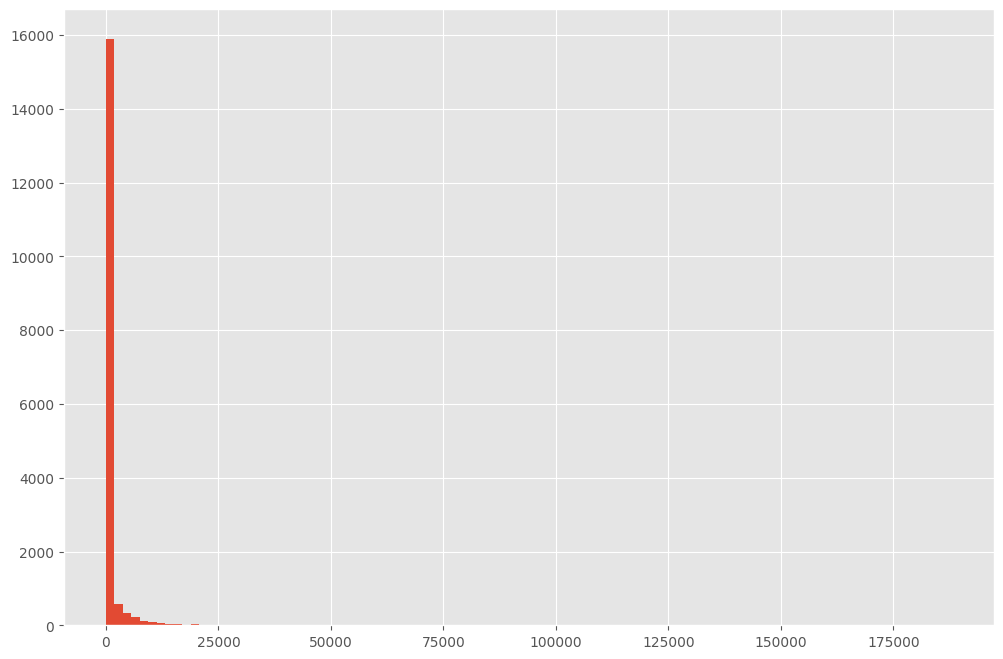

In [50]:
# Histograma de en espera.
df['On-Hold'].hist(bins=100)

<Axes: >

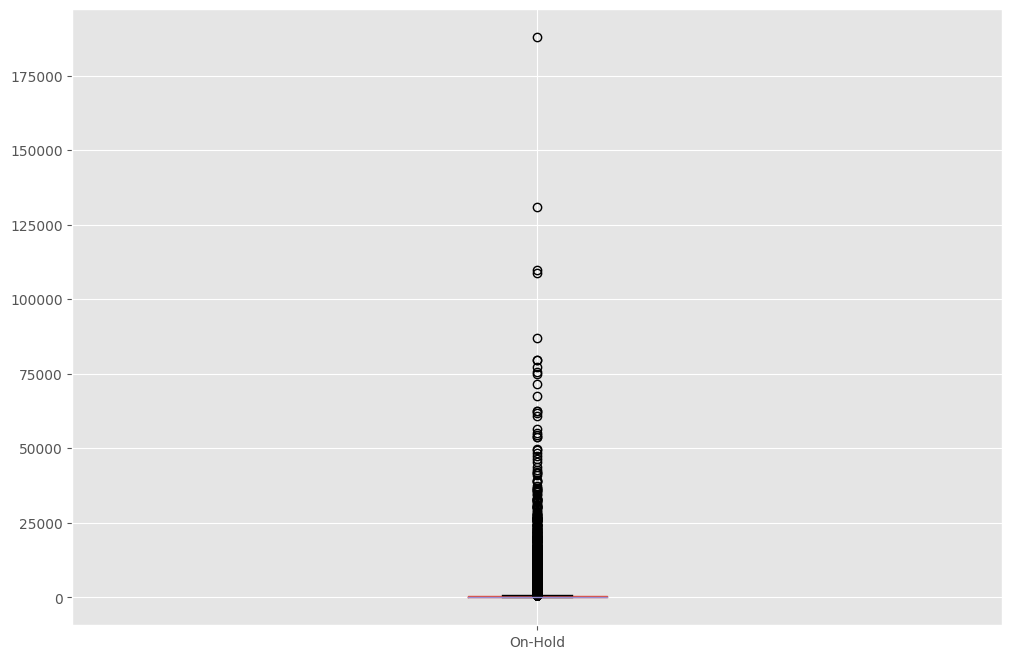

In [51]:
# box plot.
df.boxplot(column=['On-Hold'])

<Axes: >

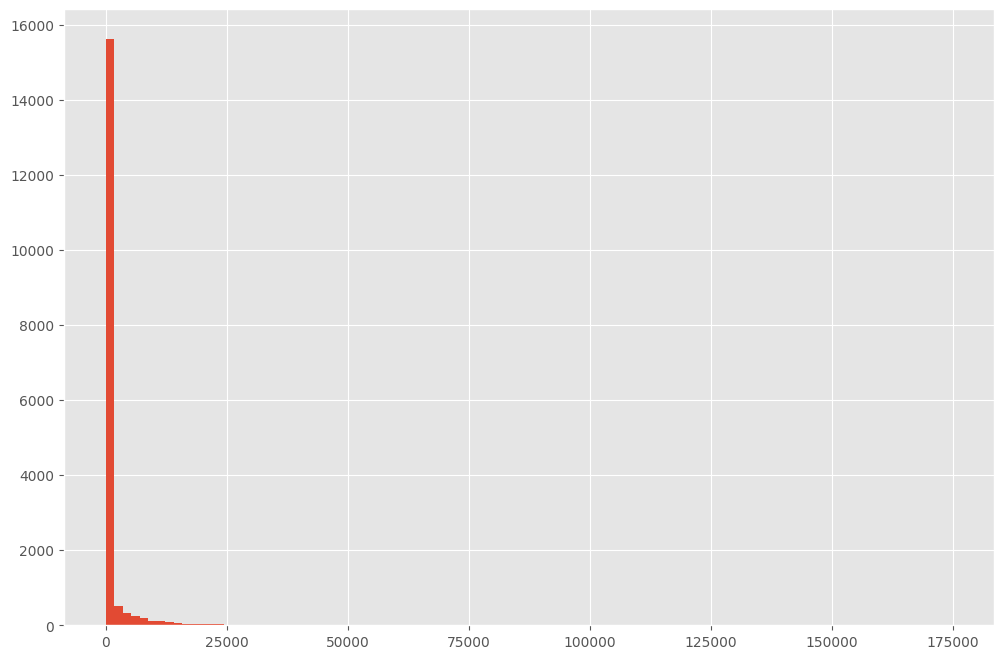

In [52]:
# Histograma de abandonado.
df['Dropped'].hist(bins=100)

<Axes: >

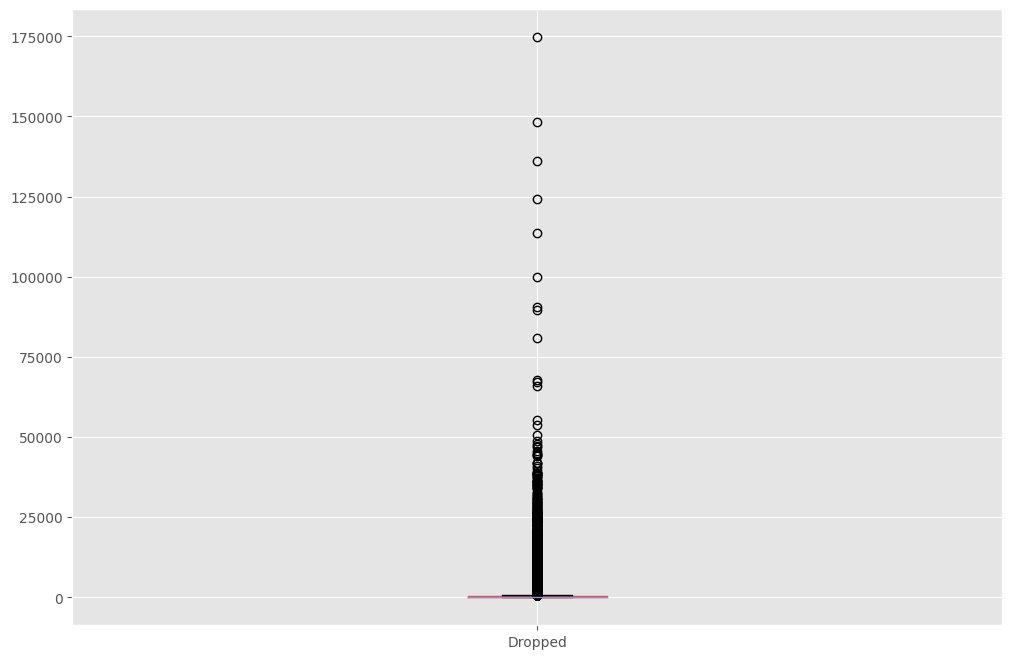

In [53]:
# box plot.
df.boxplot(column=['Dropped'])

<Axes: >

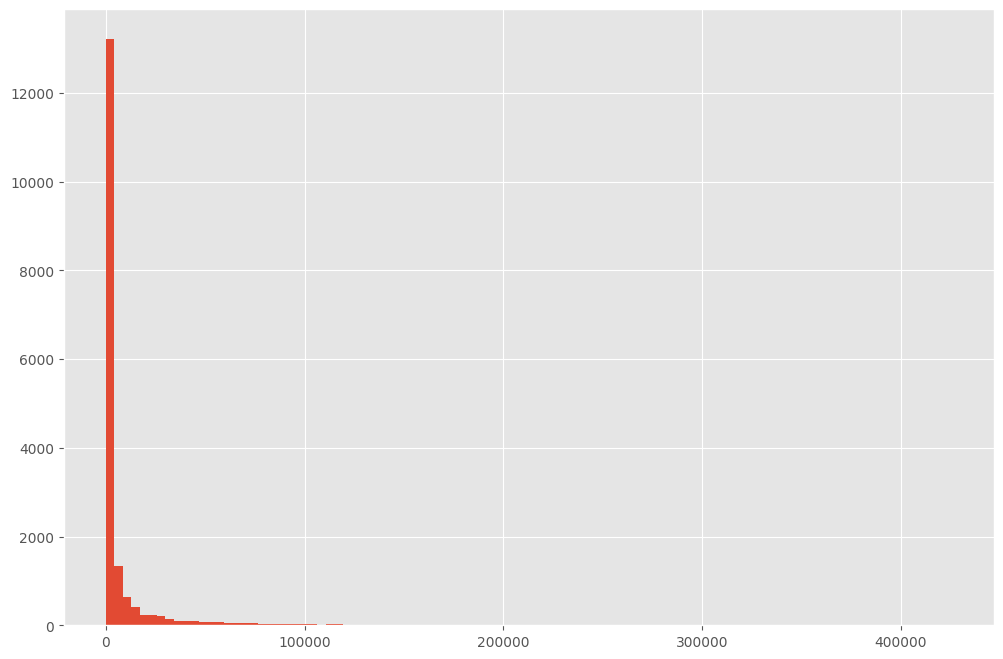

In [54]:
# Histograma de añadido.
df['Plan to Watch'].hist(bins=100)

<Axes: >

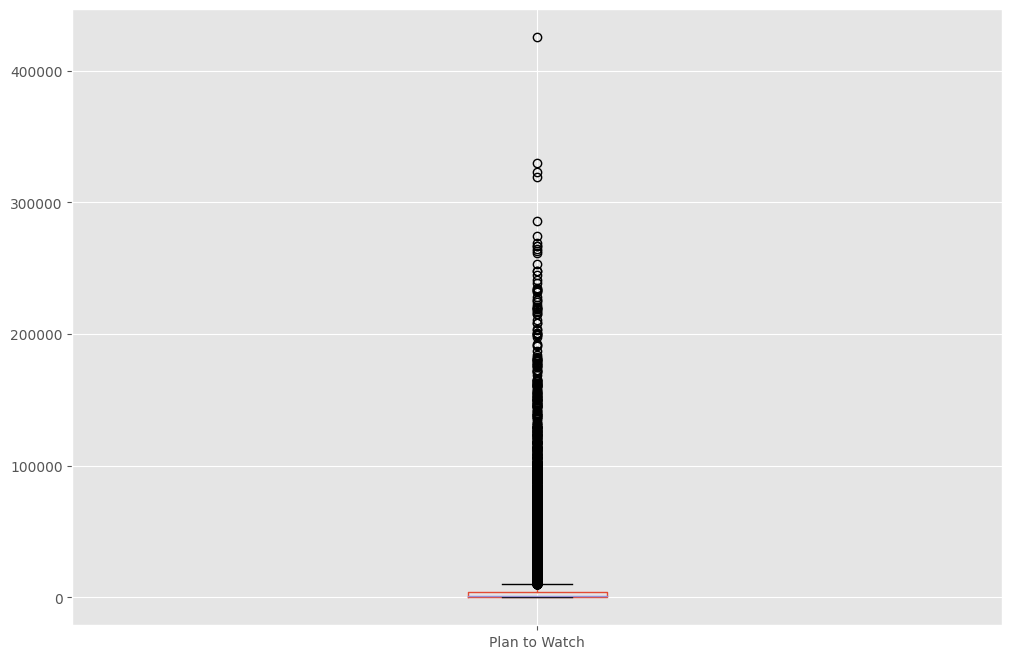

In [55]:
# box plot.
df.boxplot(column=['Plan to Watch'])

<Axes: >

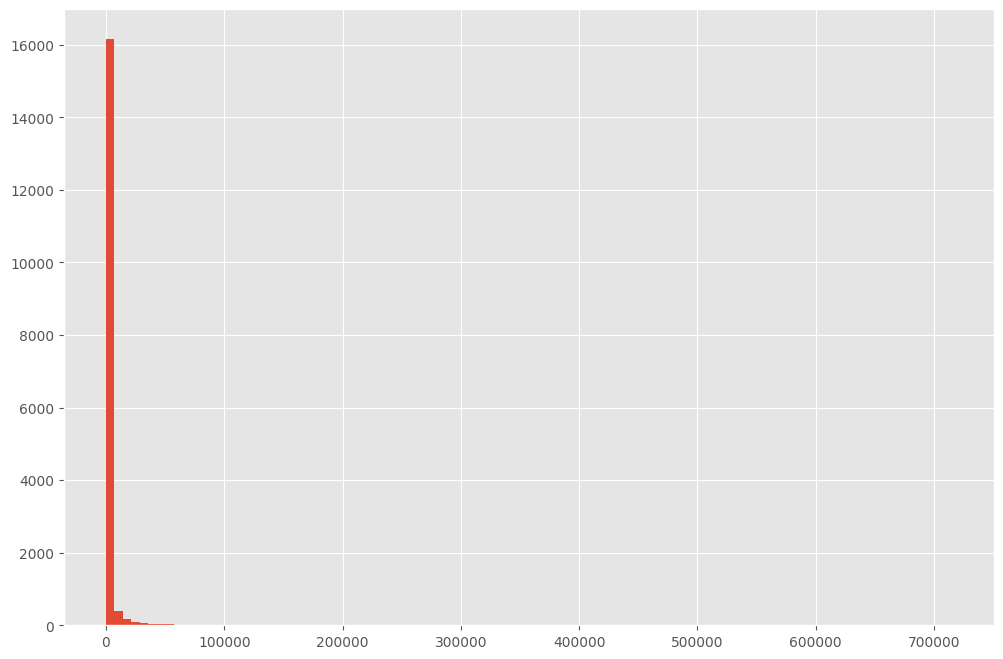

In [56]:
# Histograma de calificado en 10.
df['Score-10'].hist(bins=100)

<Axes: >

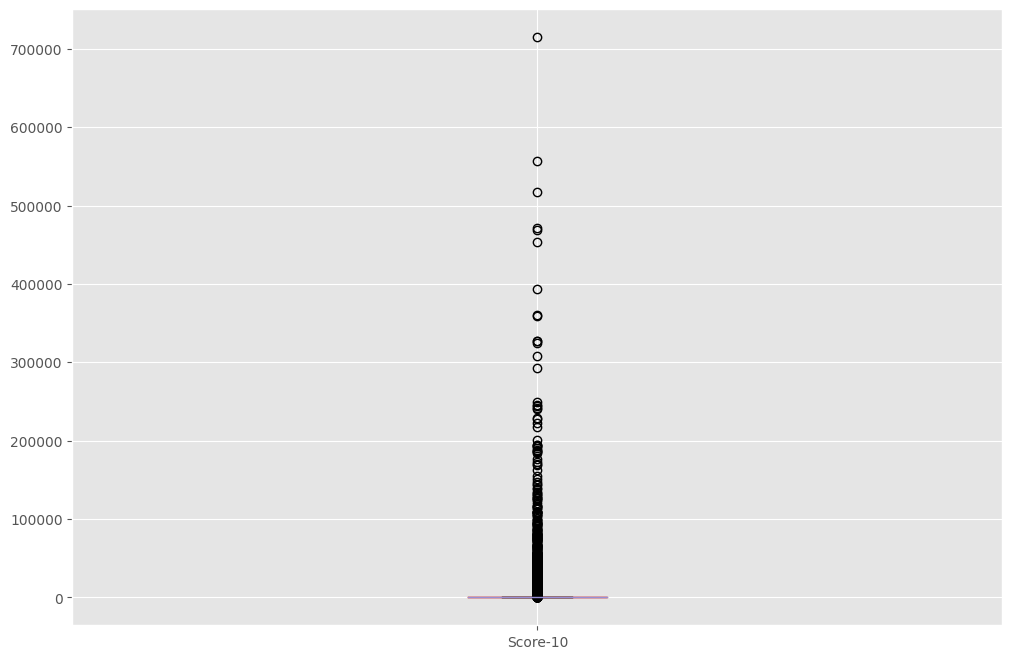

In [57]:
# box plot.
df.boxplot(column=['Score-10'])

<Axes: >

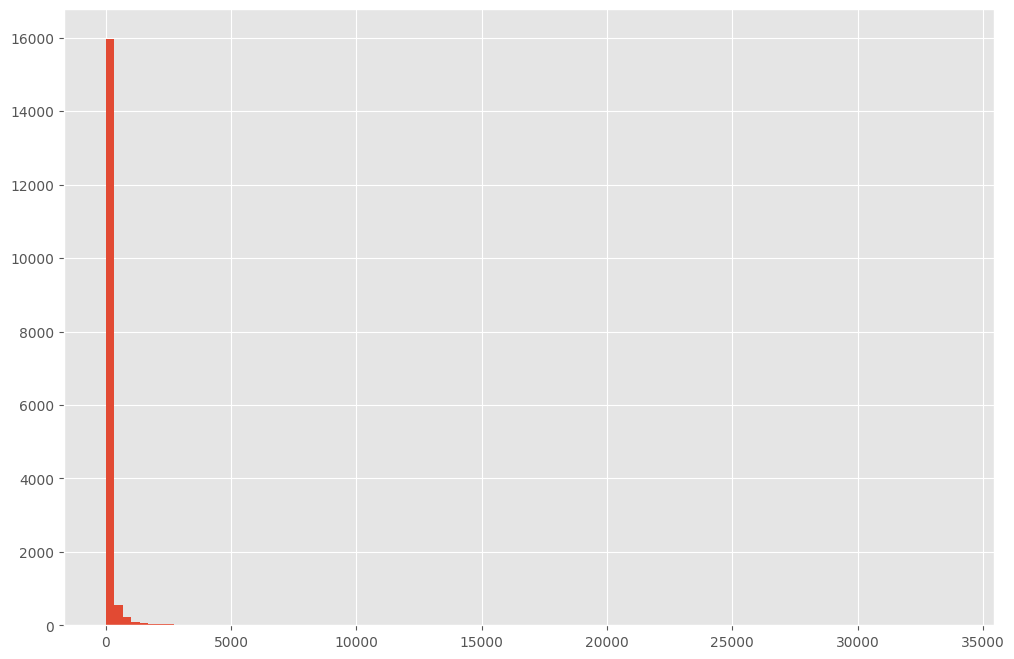

In [58]:
# Histograma de calificado en 1.
df['Score-1'].hist(bins=100)

<Axes: >

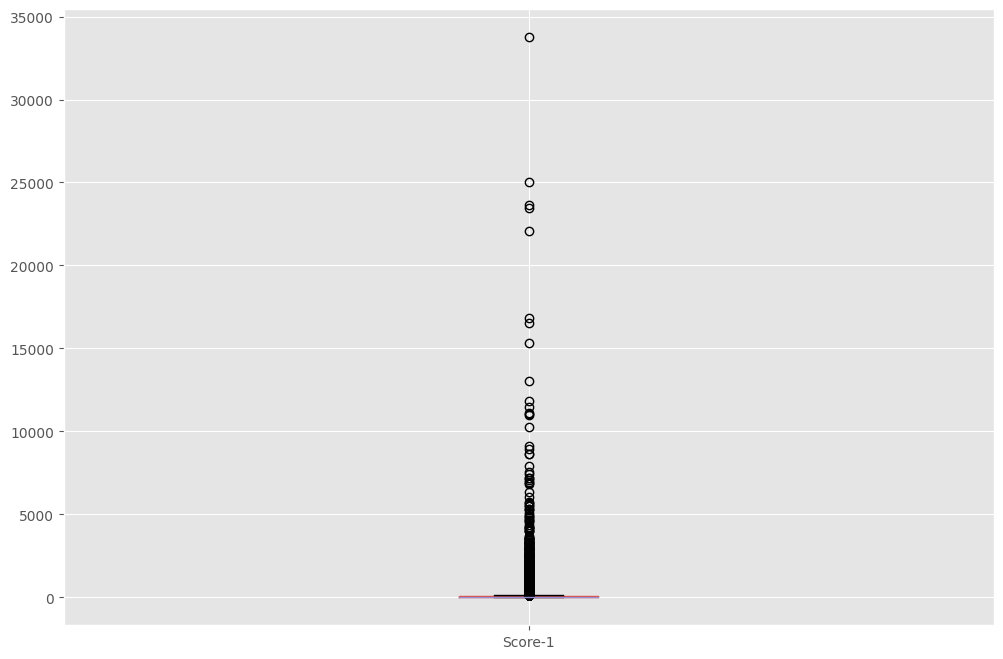

In [59]:
# box plot.
df.boxplot(column=['Score-1'])

Para la mayoria de los casos podemos determinar que todos los valores estan dentro de un rango aceptable, con una gran parte en valores cercanos a cero, por lo que se considera el límite superior como un valor bajo. Sin embargo, son precisamente estos datos fuera del límite superior los que nos resultan más interesantes para el análisis, unicamente para **Score** nos ha determinado unas cifras convenientes dentro del rango.

## 3.2. Bar Chart

Para la características categóricas. Podemos usar un gráfico de barras para aprender sobre sus categorías y distribución:

<Axes: >

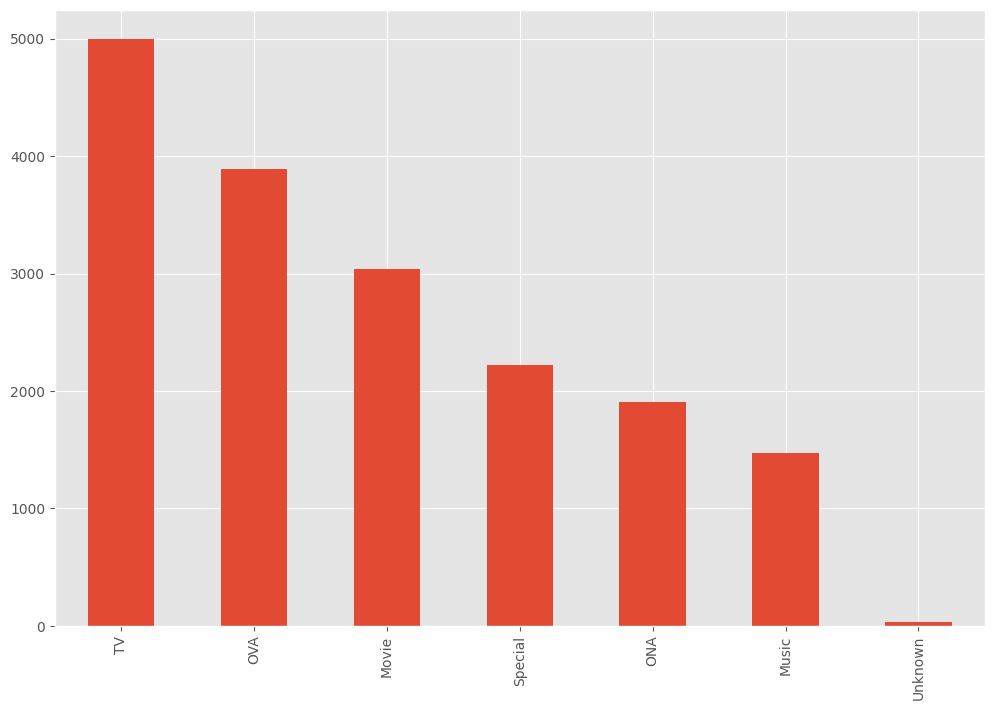

In [60]:
# bar chart -  Distribucion de la variable categorica generos
df['Type'].value_counts().plot.bar()

<Axes: >

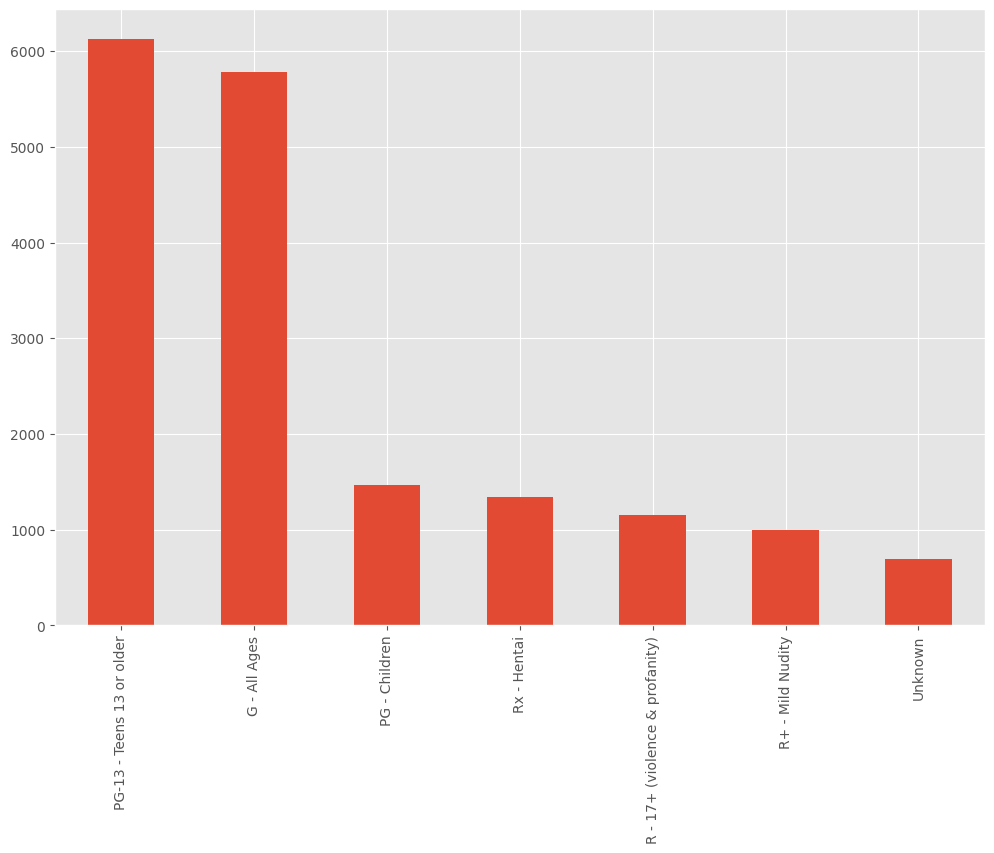

In [61]:
# bar chart -  Distribucion de la variable categorica tasa de edad
df['Rating'].value_counts().plot.bar()

<Axes: >

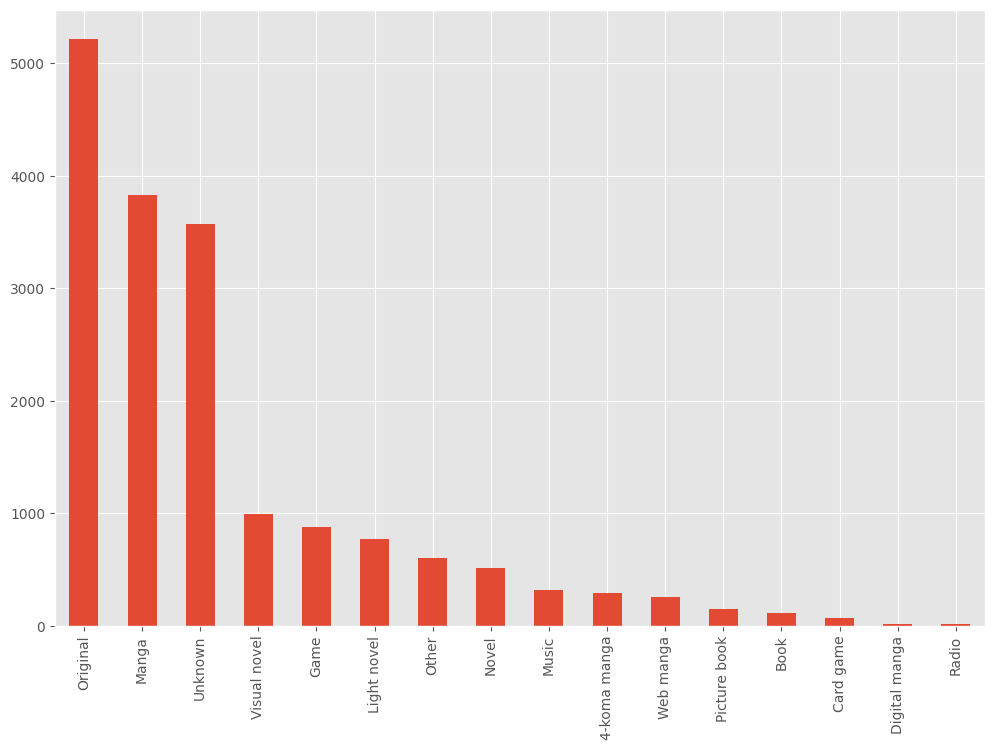

In [62]:
# bar chart -  Distribucion de la variable categorica fuente
df['Source'].value_counts().plot.bar()

Como pudimos observar las caracteristicas que tienen un menor cantidad de categorias y se pueden distribuir en graficas de barras son: **Source**, **Rating** y **Type**. Lo que nos permite extraer informacion importante.

# 4. Datos innecesarios

Después de todo el trabajo realizado para los datos que faltan y los valores atípicos, veamos los datos innecesarios, que son más sencillos.




## 4.1. Tipo innecesario: Duplicados

### En base a las características

Primero quitamos el identificador único del conjunto de datos. Luego creamos un conjunto de datos llamado *df2* eliminando los duplicados. Comparamos las formas de los dos conjuntos de datos (df y df2) para averiguar el número de filas duplicadas.

In [63]:
# Borramos duplicados
df2 = df.drop_duplicates()

# Verificamos si hay duplicados
print(df.shape)
print(df2.shape)

(17562, 35)
(17562, 35)


Se verifica que no existen duplicados.



In [64]:
# Se exporta a .csv
df.to_csv('Anime_Proc.csv')